In [1]:
import pandas as pd  
import numpy as np  
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from scipy.stats import boxcox, shapiro, levene 
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('D:/TEL-U/SEMESTER 7/TA/TAFORECAST/lagged_data.csv')
df

,Date,Close(t-10),Open(t-10),High(t-10),Low(t-10),Sentiment_Score(t-10),Adj Close(t-10),Close(t-9),Open(t-9),High(t-9),...,High(t-1),Low(t-1),Sentiment_Score(t-1),Adj Close(t-1),Close(t),Open(t),High(t),Low(t),Sentiment_Score(t),Adj Close(t)
0,2020-01-11,7200.174316,7194.892090,7254.330566,7174.944336,0.30,7200.174316,6985.470215,7202.551270,7212.155273,...,8166.554199,7726.774902,0.29,8166.554199,8037.537598,8162.190918,8218.359375,8029.642090,0.30,8037.537598
1,2020-01-12,6985.470215,7202.551270,7212.155273,6935.270020,-0.00,6985.470215,7344.884277,6984.428711,7413.715332,...,8218.359375,8029.642090,0.30,8037.537598,8192.494141,8033.261719,8200.063477,8009.059082,0.31,8192.494141
2,2020-01-13,7344.884277,6984.428711,7413.715332,6914.996094,0.22,7344.884277,7410.656738,7345.375488,7427.385742,...,8200.063477,8009.059082,0.31,8192.494141,8144.194336,8189.771973,8197.788086,8079.700684,0.13,8144.194336
3,2020-01-14,7410.656738,7345.375488,7427.385742,7309.514160,0.07,7410.656738,7411.317383,7410.451660,7544.497070,...,8197.788086,8079.700684,0.13,8144.194336,8827.764648,8140.933105,8879.511719,8140.933105,0.32,8827.764648
4,2020-01-15,7411.317383,7410.451660,7544.497070,7400.535645,0.21,7411.317383,7769.219238,7410.452148,7781.867188,...,8879.511719,8140.933105,0.32,8827.764648,8807.010742,8825.343750,8890.117188,8657.187500,0.02,8807.010742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769,2024-11-14,67811.507812,68742.132812,69433.179688,66803.648438,0.30,67811.507812,69359.562500,67811.171875,70522.789062,...,93434.351562,86256.929688,0.28,90584.164062,87250.429688,90574.882812,91765.218750,86682.812500,0.30,87250.429688
1770,2024-11-15,69359.562500,67811.171875,70522.789062,67458.867188,0.42,69359.562500,75639.078125,69358.500000,76460.156250,...,91765.218750,86682.812500,0.30,87250.429688,91066.007812,87284.179688,91868.742188,87124.898438,0.35,91066.007812
1771,2024-11-16,75639.078125,69358.500000,76460.156250,69322.031250,0.16,75639.078125,75904.859375,75637.085938,76943.117188,...,91868.742188,87124.898438,0.35,91066.007812,90558.476562,91064.367188,91763.945312,90094.226562,0.13,90558.476562
1772,2024-11-17,75904.859375,75637.085938,76943.117188,74480.421875,0.09,75904.859375,76545.476562,75902.835938,77252.750000,...,91763.945312,90094.226562,0.13,90558.476562,89845.851562,90558.460938,91433.039062,88741.664062,0.15,89845.851562


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 67 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   1774 non-null   object 
 1   Close(t-10)            1774 non-null   float64
 2   Open(t-10)             1774 non-null   float64
 3   High(t-10)             1774 non-null   float64
 4   Low(t-10)              1774 non-null   float64
 5   Sentiment_Score(t-10)  1774 non-null   float64
 6   Adj Close(t-10)        1774 non-null   float64
 7   Close(t-9)             1774 non-null   float64
 8   Open(t-9)              1774 non-null   float64
 9   High(t-9)              1774 non-null   float64
 10  Low(t-9)               1774 non-null   float64
 11  Sentiment_Score(t-9)   1774 non-null   float64
 12  Adj Close(t-9)         1774 non-null   float64
 13  Close(t-8)             1774 non-null   float64
 14  Open(t-8)              1774 non-null   float64
 15  High

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1774 entries, 2020-01-11 to 2024-11-18
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Close(t-10)            1774 non-null   float64
 1   Open(t-10)             1774 non-null   float64
 2   High(t-10)             1774 non-null   float64
 3   Low(t-10)              1774 non-null   float64
 4   Sentiment_Score(t-10)  1774 non-null   float64
 5   Adj Close(t-10)        1774 non-null   float64
 6   Close(t-9)             1774 non-null   float64
 7   Open(t-9)              1774 non-null   float64
 8   High(t-9)              1774 non-null   float64
 9   Low(t-9)               1774 non-null   float64
 10  Sentiment_Score(t-9)   1774 non-null   float64
 11  Adj Close(t-9)         1774 non-null   float64
 12  Close(t-8)             1774 non-null   float64
 13  Open(t-8)              1774 non-null   float64
 14  High(t-8)              1774 non-null  

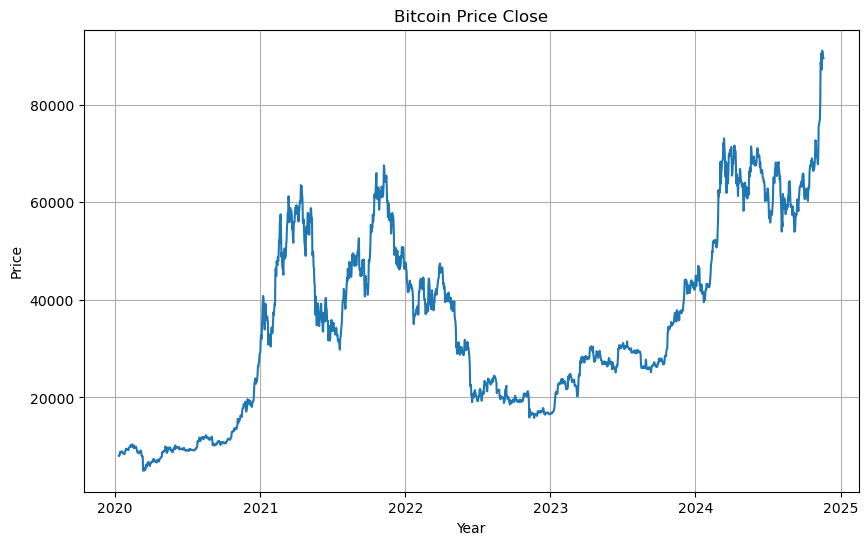

In [6]:
# Line plot using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Adj Close(t)'],linestyle='-')
plt.title('Bitcoin Price Close')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()

UJI ADF

In [7]:
# Melakukan uji ADF
result = adfuller(df['Adj Close(t)'])

# Menampilkan hasil uji ADF
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Optimal Number of Lags:', result[2])
print('Critical Values:')
# Nilai kritis dibutuhkan untuk membandingkan dengan nilai statistik ADF.

# loop untuk mencetak nilai-nilai kritis yang disimpan dalam result[4].
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpretasi hasil uji ADF
if result[1] < 0.05:
    print(f'P-Value ({result[1]}) < 0.05: Data tidak memiliki akar unit, data bersifat stasioner')
else:
    print(f'P-Value ({result[1]}) >= 0.05: Data memiliki akar unit, data bersifat tidak stasioner')

ADF Statistic: -0.4501152418005298
p-value: 0.9013891024479215
Optimal Number of Lags: 13
Critical Values:
   1%: -3.4340709449678415
   5%: -2.8631835901181564
   10%: -2.567644997740186
P-Value (0.9013891024479215) >= 0.05: Data memiliki akar unit, data bersifat tidak stasioner


Lambda yang digunakan untuk transformasi Box-Cox: 0.4773


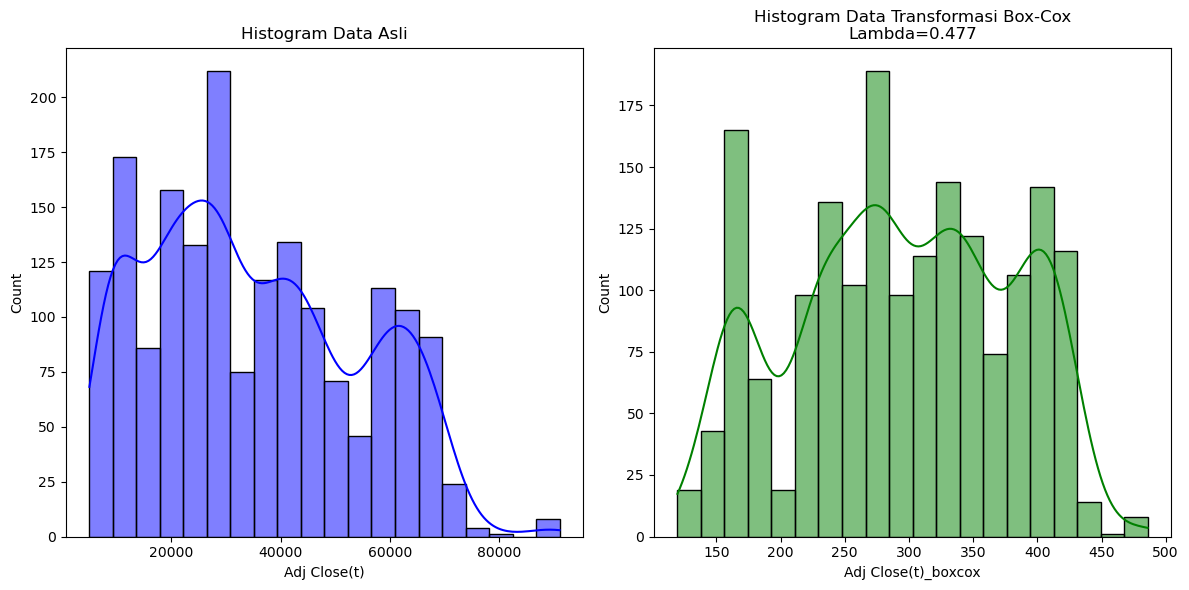

Statistik Uji Levene: 3823.4972440607985
Nilai p: 0.0
Nilai p < 0.05: Varians data transformasi tidak homogen (berbeda dari data asli).


In [8]:
df_boxcox = df.copy()  
column_to_transform = 'Adj Close(t)'  

# Langkah 2: Transformasi Box-Cox  
data_transformed, fitted_lambda = boxcox(df_boxcox[column_to_transform])  
df_boxcox[column_to_transform + '_boxcox'] = data_transformed  

# Menampilkan nilai lambda  
print(f"Lambda yang digunakan untuk transformasi Box-Cox: {fitted_lambda:.4f}")  

# Langkah 3: Plotting histogram untuk data asli dan hasil transformasi  
plt.figure(figsize=(12, 6))  
plt.subplot(1, 2, 1)  
sns.histplot(df_boxcox[column_to_transform], bins=20, kde=True, color='blue')  
plt.title('Histogram Data Asli')  

plt.subplot(1, 2, 2)  
sns.histplot(df_boxcox[column_to_transform + '_boxcox'], bins=20, kde=True, color='green')  
plt.title(f'Histogram Data Transformasi Box-Cox\nLambda={fitted_lambda:.3f}')  

plt.tight_layout()  
plt.show()  

# Langkah 4: Uji Levene untuk homogenitas varians  
statistik_uji_levene, nilai_p_uji_levene = levene(df_boxcox[column_to_transform], df_boxcox[column_to_transform + '_boxcox'])  
print(f"Statistik Uji Levene: {statistik_uji_levene}")  
print(f"Nilai p: {nilai_p_uji_levene}")  

if nilai_p_uji_levene < 0.05:  
    print("Nilai p < 0.05: Varians data transformasi tidak homogen (berbeda dari data asli).")  
else:  
    print("Nilai p >= 0.05: Varians data transformasi homogen (mirip dengan data asli).") 

In [9]:
df['Transformed_' + column_to_transform] = data_transformed  

# 3. Differencing pada data yang sudah ditransformasi  
df['Differenced_Transformed_' + column_to_transform] = df['Transformed_' + column_to_transform].diff()  

# 4. Menghilangkan nilai NaN dari hasil differencing  
df.dropna(subset=['Differenced_Transformed_' + column_to_transform], inplace=True)  

# 5. Menyimpan hasil differencing ke dalam kolom final  
df['differenced'] = df['Differenced_Transformed_' + column_to_transform]  

# 6. Uji ADF pada hasil differencing  
adf_result = adfuller(df['differenced'])  

# 7. Menampilkan hasil ADF  
print(f"ADF Statistic: {adf_result[0]}")  
print(f"p-value: {adf_result[1]}")  
print("Critical Values:")  
for key, value in adf_result[4].items():  
    print(f"   {key}: {value}")  

# 8. Interpretasi hasil ADF test  
if adf_result[1] < 0.05:  
    print("P-Value < 0.05: Data yang telah di-differencing bersifat stasioner.")  
else:  
    print("P-Value >= 0.05: Data yang telah di-differencing belum bersifat stasioner.")  

ADF Statistic: -13.547082057705875
p-value: 2.449705274039595e-25
Critical Values:
   1%: -3.4340624951248593
   5%: -2.863179860030804
   10%: -2.5676430115666826
P-Value < 0.05: Data yang telah di-differencing bersifat stasioner.


Plot ACF dan PACF

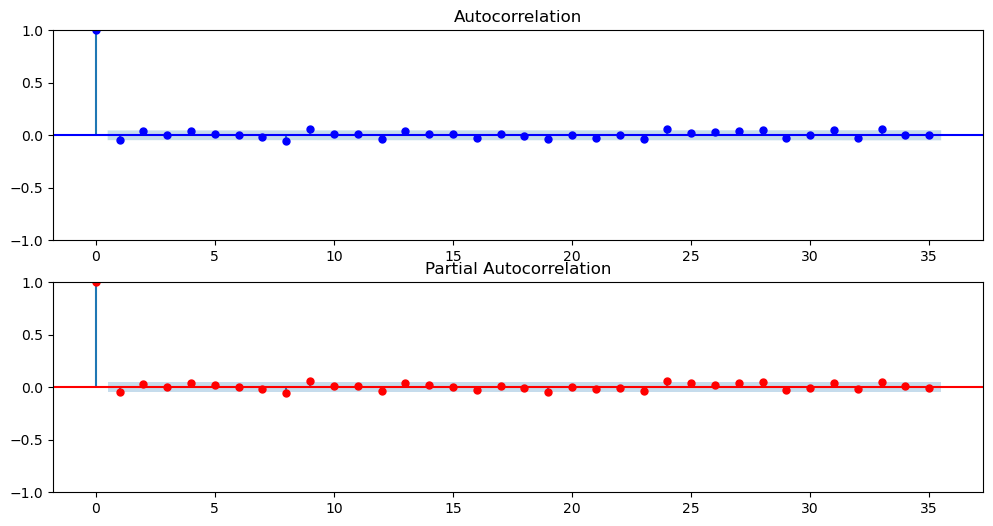

In [10]:
# Step 4: Plot ACF dan PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(df['differenced'].dropna(), lags=35, ax=plt.gca(), color = 'blue')
plt.subplot(212)
plot_pacf(df['differenced'].dropna(),lags=35, ax=plt.gca(), color = 'red')
plt.show()

In [11]:
# Pastikan kolom 'Adj_Close_diff' tidak memiliki nilai NaN  
df['differenced'].dropna(inplace=True)  

# Menghitung ACF dan PACF  
acf_vals = acf(df['differenced'], nlags=50)  
pacf_vals = pacf(df['differenced'], nlags=50)  

# Menentukan batas cut-off  
batas_cut_off = 1.96 / len(df['differenced']) ** 0.5  

# Identifikasi lag-lag yang melampaui batas cut-off pada ACF  
cutoff_acf = [lag for lag in range(len(acf_vals)) if abs(acf_vals[lag]) > batas_cut_off]  

# Identifikasi lag-lag yang melampaui batas cut-off pada PACF  
cutoff_pacf = [lag for lag in range(len(pacf_vals)) if abs(pacf_vals[lag]) > batas_cut_off]  

# Tampilkan hasil  
print('Lags yang melampaui batas cut-off pada ACF:', cutoff_acf)  
print('Lags yang melampaui batas cut-off pada PACF:', cutoff_pacf)  

Lags yang melampaui batas cut-off pada ACF: [0, 8, 9, 24, 28, 31, 33, 36, 40, 44]
Lags yang melampaui batas cut-off pada PACF: [0, 8, 9, 24, 28, 33, 36, 40, 44, 46]


In [17]:
from statsmodels.tsa.arima.model import ARIMA

best_aic = np.inf
best_order = None

# Tentukan nilai p dan q berdasarkan hasil ACF dan PACF
p_values = [0, 8, 9, 24, 28, 33, 36, 40, 44, 46]  # Berdasarkan hasil PACF
q_values = [0, 8, 9, 24, 28, 31, 33, 36, 40, 44]  # Berdasarkan hasil ACF
d_values = 1  # Asumsi differencing

# Variabel eksogen (Sentiment_Score_t)
X1 = df[['Sentiment_Score(t)']] 

for p in p_values:
    for q in q_values:
        order = (p, d_values, q)
        try:
            # Membangun model ARIMAX dengan variabel eksogen
            model = ARIMA(df['differenced'], order=order, exog=X1)
            model_fit = model.fit()
            aic = model_fit.aic
            if aic < best_aic:
                best_aic = aic
                best_order = order
        except Exception as e:
            print(f"Error for order {order}: {e}")
            continue

print('Model ARIMAX terbaik:', best_order)
print('AIC terbaik:', best_aic)

Model ARIMAX terbaik: (9, 1, 9)
AIC terbaik: 10628.672078939779


In [12]:
import statsmodels.api as sm
best_order = (9, 1, 9)

# Estimasi Parameter   
X1 = df[['Sentiment_Score(t)']]
model_scenario_1 = sm.tsa.ARIMA(df['differenced'].dropna(), order=best_order, exog=X1)  
results_scenario_1 = model_scenario_1.fit()  
print(results_scenario_1.summary())

                               SARIMAX Results                                
Dep. Variable:            differenced   No. Observations:                 1773
Model:                 ARIMA(9, 1, 9)   Log Likelihood               -5294.336
Date:                Sun, 05 Jan 2025   AIC                          10628.672
Time:                        11:25:40   BIC                          10738.269
Sample:                    01-12-2020   HQIC                         10669.161
                         - 11-18-2024                                         
Covariance Type:                  opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Sentiment_Score(t)     0.2939      0.810      0.363      0.717      -1.294       1.882
ar.L1                 -1.5815      0.356     -4.437      0.000      -2.280      -0.883
ar.L2               

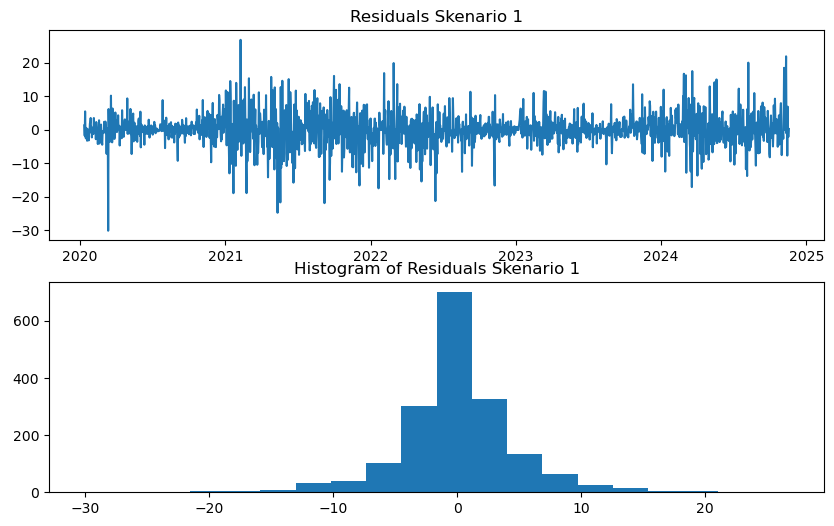

In [11]:
# Uji Kelayakan Model  
def check_residuals(results, title):  
    residuals = results.resid  
    plt.figure(figsize=(10, 6))  
    plt.subplot(211)  
    plt.plot(residuals)  
    plt.title(f'Residuals {title}')  
    
    plt.subplot(212)  
    plt.hist(residuals, bins=20)  
    plt.title(f'Histogram of Residuals {title}')  
    plt.show()  

check_residuals(results_scenario_1, "Skenario 1") 

In [12]:
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np

# Residual dari model
residuals = results_scenario_1.resid

# Uji Ljung-Box dengan jumlah lag tertentu
lags = 20  # Jumlah lag yang diuji
ljungbox_results = acorr_ljungbox(residuals, lags=lags, return_df=True)

# Menampilkan hasil uji Ljung-Box
print("Hasil Uji Ljung-Box:")
print(ljungbox_results)

# Logika keputusan berdasarkan p-value
if any(ljungbox_results['lb_pvalue'] < 0.05):
    print("\nTolak H0: Sisaan tidak bersifat white noise.")
else:
    print("\nTerima H0: Sisaan bersifat white noise.")

Hasil Uji Ljung-Box:
      lb_stat  lb_pvalue
1    0.070386   0.790776
2    0.097234   0.952546
3    0.134245   0.987433
4    1.100136   0.894251
5    1.381316   0.926346
6    1.587955   0.953439
7    1.764981   0.971697
8    1.772871   0.987201
9    2.505701   0.980730
10   2.543319   0.990229
11   2.849976   0.992564
12   3.266382   0.993353
13   3.295168   0.996643
14   6.714771   0.945149
15   8.157422   0.917316
16   8.794983   0.921616
17   8.909942   0.943045
18   9.709934   0.940964
19  10.492688   0.939728
20  11.368223   0.936109

Terima H0: Sisaan bersifat white noise.


In [13]:
from scipy.stats import kstest, norm

# Spesifikasi order ARIMA terbaik (contoh: (10, 1, 21))
order = (9, 1, 9)

# Estimasi model ARIMA
model = sm.tsa.ARIMA(df['differenced'], order=order)
results = model.fit()

# Dapatkan sisaan (residuals) dari model
residuals = results.resid

# Standardisasi residual
residuals_standardized = (residuals - residuals.mean()) / residuals.std()

# Uji Kolmogorov-Smirnov
ks_statistic, ks_p_value = kstest(residuals_standardized, 'norm')

# Tampilkan hasil uji
print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {ks_p_value}")

# Evaluasi hasil uji
alpha = 0.05
if ks_p_value < alpha:
    print('P-value < 0.05: Sisaan tidak terdistribusi normal.')
else:
    print('P-value >= 0.05: Tidak cukup bukti untuk menolak asumsi normalitas sisaan.')

KS Statistic: 0.09234687555436816
P-value: 1.3114975069879728e-13
P-value < 0.05: Sisaan tidak terdistribusi normal.


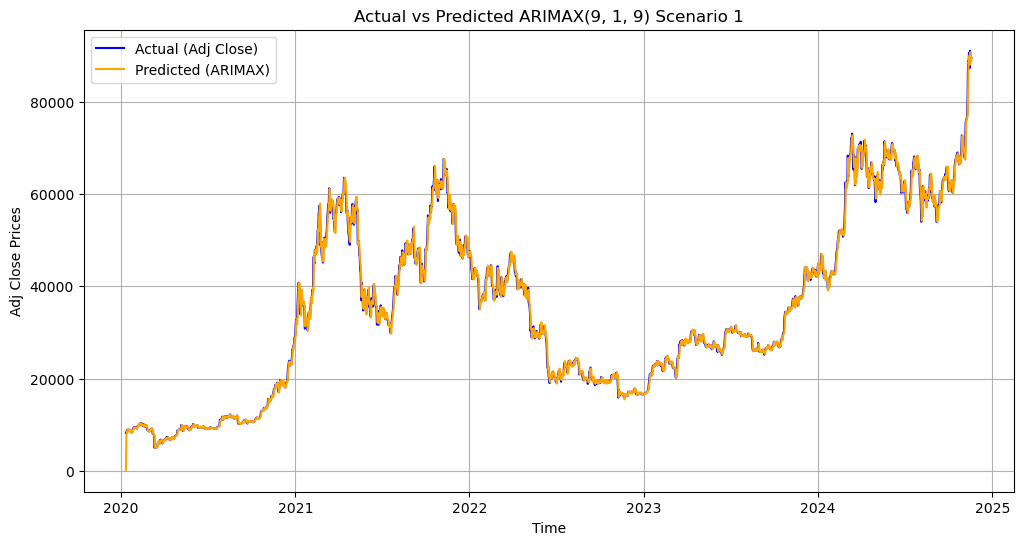

In [18]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from statsmodels.tsa.statespace.sarimax import SARIMAX  

# Tentukan parameter model  
best_order = (9, 1, 9)  

# Prepare the exogenous variable  
X1 = df[['Sentiment_Score(t)']].dropna()  # Pastikan tidak ada nilai NA  

# Pastikan Anda bekerja dengan nilai non-NA untuk 'Adj Close(t)' dan variabel eksogen yang sesuai  
Y = df['Adj Close(t)'].dropna()  # Data aktual Anda  

# Sesuaikan panjang jika diperlukan  
if len(X1) != len(Y):  
    Y = Y[-len(X1):]  # Trim ke ukuran X1 jika perlu  

# Fit model ARIMAX  
model_scenario_1 = SARIMAX(Y, exog=X1, order=best_order)  
results_scenario_1 = model_scenario_1.fit()  

# Predictions berdasarkan model yang terfitted  
predictions = results_scenario_1.predict(start=len(X1)-len(results_scenario_1.fittedvalues),   
                                           end=len(X1)-1,   
                                           exog=X1)  

# Mendapatkan nilai aktual untuk perbandingan  
actual_values = Y[-len(predictions):]  # Sesuaikan nilai aktual dengan prediksi  

# Plotting Actual vs Predicted  
plt.figure(figsize=(12, 6))  
plt.plot(actual_values.index, actual_values, label='Actual (Adj Close)', color='blue')  
plt.plot(predictions.index, predictions, label='Predicted (ARIMAX)', color='orange')  
plt.title('Actual vs Predicted ARIMAX(9, 1, 9) Scenario 1')  
plt.xlabel('Time')  
plt.ylabel('Adj Close Prices')  
plt.legend()  
plt.grid()  
plt.show()

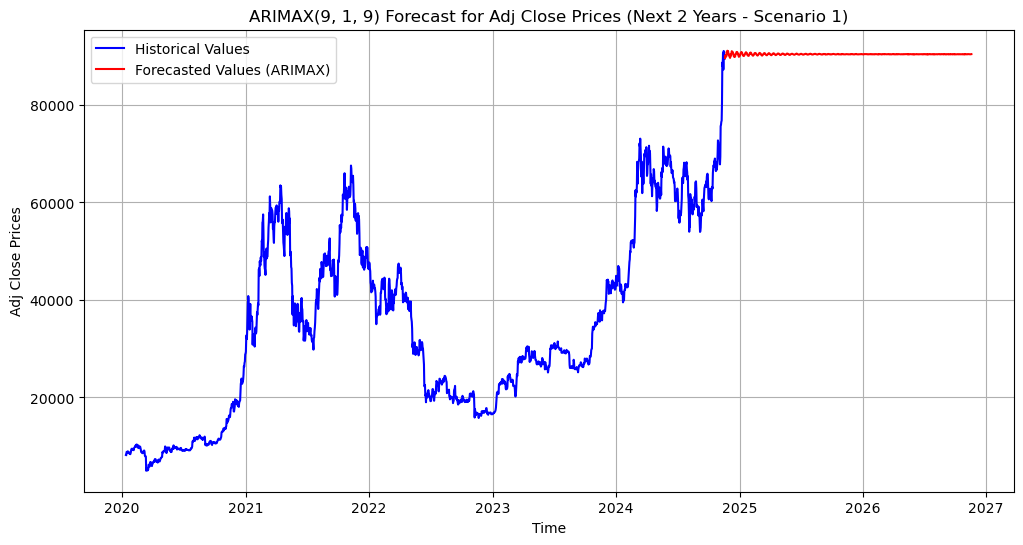

In [19]:
# Forecasting for the next 2 years  
n_steps = 365 * 2  # 2 years of daily data  

# Prepare future exogenous variables  
future_sentiment_index = pd.date_range(start=Y.index[-1] + pd.Timedelta(days=1), periods=n_steps, freq='D')  
future_sentiment = pd.DataFrame(index=future_sentiment_index, columns=X1.columns)  

# Placeholder for future sentiment scores — replace with actual predictions or estimations  
# Here it's filled with random values; this should be replaced with realistic forecasts  
future_sentiment['Sentiment_Score(t)'] = np.random.rand(n_steps)  

# Make predictions  
forecast = results_scenario_1.forecast(steps=n_steps, exog=future_sentiment)  

# Plotting the forecasted values  
plt.figure(figsize=(12, 6))  
plt.plot(Y.index, Y, label='Historical Values', color='blue')  
plt.plot(future_sentiment.index, forecast, label='Forecasted Values (ARIMAX)', color='red')  
plt.title('ARIMAX(9, 1, 9) Forecast for Adj Close Prices (Next 2 Years - Scenario 1)')  
plt.xlabel('Time')  
plt.ylabel('Adj Close Prices')  
plt.legend()  
plt.grid()  
plt.show()  

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error  

# Generate some random future actual values for comparison
actual_future_values = pd.Series(data=np.random.rand(n_steps) * (Y.max() - Y.min()) + Y.min(),  
                                  index=future_sentiment_index)  

# Calculate evaluation metrics  
mse = mean_squared_error(actual_future_values, forecast)  
rmse = np.sqrt(mse)  
mae = mean_absolute_error(actual_future_values, forecast)  

# Output metrics (ensure they are floats)
print(f'Mean Squared Error (MSE): {float(mse):.2f}')  
print(f'Root Mean Squared Error (RMSE): {float(rmse):.2f}')  
print(f'Mean Absolute Error (MAE): {float(mae):.2f}')

Mean Squared Error (MSE): 2366975990.06
Root Mean Squared Error (RMSE): 48651.58
Mean Absolute Error (MAE): 41964.65
